In [2]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
data = pd.read_csv('515K hotel dataset.csv')

In [ ]:
#Missing value: Drop the reviews with missing value directly.
data.dropna(inplace = True)
data.drop('Unnamed: 0', 1, inplace =True)
data.reset_index(drop = True, inplace = True)

In [ ]:
#One-side Reviews: Remove the review with "No Negative"/"No Positive". 
data['NegativeReview'].replace('No Negative', "", inplace = True)
data['PositiveReview'].replace('No Positive', "", inplace = True)

In [ ]:
#Combine: Positive and negative reviews would be treated as only a review, and in addition : lower the case. 
corpus = data.NegativeReview + data.PositiveReview
data.insert(0, "Review", corpus.str.lower())

In [ ]:
#欲刪除的標點符號
import re
remove1 = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'  

for i in range(len(data['Review'])):
    print(i)
    data['Review'][i] = re.sub(remove1,"",data['Review'][i])

In [ ]:
#Tokenization: Conduct the work_tokenize first. (sent_tokenizing is more complicated in this case.)
from nltk.tokenize import sent_tokenize, word_tokenize  
word_tokenized = data.Review.apply(word_tokenize)
data.insert(0,"WordToken", word_tokenized)

In [ ]:
#Anomaly, Weird records: Drop the empty review(or we could remove the review with less than 5 words?)
word_count = data.WordToken.apply(lambda x: len(x))
filter_count = (word_count >= 1)
data = data[filter_count]
data.reset_index(drop = True, inplace = True)

In [ ]:
#Lemmatization: Convert the terms with different representations into the original.
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
def lemmatize_text(text):
    return [wnl.lemmatize(w) for w in text]

data.insert(0, 'Lemmatized',data.WordToken.apply(lemmatize_text))

In [ ]:
#StopWordRemoval: Remove the NLTK build-in stopwords in all the records.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wosw = data.Lemmatized.apply(lambda x:  [item for item in x if item not in stop_words] )
data.insert(0, 'preprocessing_finished',wosw)

In [3]:
# data.to_csv('hotelreviews.csv',sep=',')
df = pd.read_csv('hotelreviews.csv')

In [4]:
df.drop('Unnamed: 0', 1, inplace =True)
df

,preprocessing_finished,Lemmatized,WordToken,Review,NegativeReview,PositiveReview,TripStyle
0,"['started', 'big', 'noise', 'worker', 'loading...","['am', 'started', 'big', 'noise', 'worker', 'l...","['am', 'started', 'big', 'noise', 'workers', '...",am started big noise workers loading wood d...,6 30 AM started big noise workers loading woo...,Style location rooms,Business
1,"['hotel', 'renovated', 'great', 'care', 'appre...","['this', 'hotel', 'is', 'being', 'renovated', ...","['this', 'hotel', 'is', 'being', 'renovated', ...",this hotel is being renovated with great care...,NaN,This hotel is being renovated with great care...,Business
2,"['public', 'area', 'lovely', 'room', 'wa', 'ni...","['public', 'area', 'are', 'lovely', 'and', 'th...","['public', 'areas', 'are', 'lovely', 'and', 't...",public areas are lovely and the room was nice...,NaN,Public areas are lovely and the room was nice...,Business
3,"['careful', 'still', 'renovating', 'building',...","['careful', 'they', 'are', 'still', 'renovatin...","['careful', 'they', 'are', 'still', 'renovatin...",careful they are still renovating the buildin...,Careful they are still renovating the buildin...,Great hotel original concept style,Business
4,"['cleaned', 'well', 'lady', 'pushing', 'pay', ...","['not', 'cleaned', 'well', 'lady', 'pushing', ...","['not', 'cleaned', 'well', 'lady', 'pushing', ...",not cleaned well lady pushing to pay during m...,not cleaned well lady pushing to pay during m...,the building meeting rooms modern style of my...,Business
5,"['hotel', 'going', 'major', 'construction', 'r...","['hotel', 'is', 'going', 'through', 'a', 'majo...","['hotel', 'is', 'going', 'through', 'a', 'majo...",hotel is going through a major construction r...,Hotel is going through a major construction r...,Love the design of the renovated product The ...,Business
6,"['water', 'pressure', 'shower', 'wa', 'existen...","['water', 'pressure', 'in', 'my', 'shower', 'w...","['water', 'pressure', 'in', 'my', 'shower', 'w...",water pressure in my shower was no existent f...,Water pressure in my shower was no existent F...,Staff were amazing very very friendly and pro...,Business
7,"['service', 'horrible', 'pillow', 'super', 'st...","['service', 'horrible', 'pillow', 'super', 'st...","['service', 'horrible', 'pillows', 'super', 's...",service horrible pillows super stiff and big ...,Service horrible Pillows super stiff and big ...,clean and new,Business
8,"['wa', 'construction', 'work', 'going', 'hotel...","['there', 'wa', 'construction', 'work', 'going...","['there', 'was', 'construction', 'work', 'goin...",there was construction work going on in the h...,there was construction work going on in the h...,location in the park Cool interior design com...,Business
9,"['hotel', 'currently', 'renovated', 'old', 'bu...","['the', 'hotel', 'is', 'currently', 'being', '...","['the', 'hotel', 'is', 'currently', 'being', '...",the hotel is currently being renovated being ...,The hotel is currently being renovated Being ...,The restaurant opened 2 days before however t...,Business


In [5]:
#BOW TFIDF with unigram/ uni-bigram
def dum(doc):
    return doc
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', 
                             ngram_range = (1,1),     #多1%   
                             tokenizer = dum, 
                             preprocessor = dum,
                             min_df = 5000)   #5000
x = vectorizer.fit_transform(df.preprocessing_finished)
vec = x.toarray()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_ = vec
lbl_ = le.fit_transform(df['TripStyle'])   # 0 for Business, 1 for Leisure trip

#Split them into train/test set, randomly with the test size 0.33 
from sklearn.model_selection import train_test_split
x_train, x_test, lbl_train, lbl_test = train_test_split(x_, lbl_ , test_size = 0.33, shuffle = True)

In [9]:
print(x_train.shape)
print(lbl_train.shape)

(111076, 31)
(111076,)


In [10]:
lbl_train2 = lbl_train
lbl_test2 = lbl_test
print(lbl_train2.shape)
print(lbl_test2.shape)

(111076,)
(54710,)


In [7]:
from sklearn.naive_bayes import BernoulliNB
clf_B_nb = BernoulliNB()
clf_B_nb.fit(x_train, lbl_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, lbl_train)

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, lbl_train)

In [11]:
#DNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding 
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=31, kernel_initializer='normal', activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1024, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
# Add output layer
model.add(Dense(units=2, kernel_initializer='normal', activation='softmax'))
print(model.summary())
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
lbl_train = np_utils.to_categorical(lbl_train) 
lbl_test = np_utils.to_categorical(lbl_test)
# 進行訓練
model.fit(x=x_train, y=lbl_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)
scores = model.evaluate(x_test, lbl_test)
print('test loss:', scores[0])
print('test accuracy:', scores[1])

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [12]:
#Evaluation function:
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, accuracy_score, classification_report
import imblearn
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt

#ref: https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used
def evaluating(test, pred, ax=object):
  
    print('accuracy:',accuracy_score(test, pred))
    print('\n')
    print( classification_report_imbalanced(test, pred))    
    print('\n')
    print ( confusion_matrix(test, pred))
    precision, recall, threshold = precision_recall_curve(test, pred)

    ax.step(recall, precision, color='b', alpha=1, where='post')
    ax.fill_between(recall, precision, step='post', alpha=0.5, color='b')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    ax.set_title('Precision-Recall curve')
    return ax

In [ ]:
# predict for test set(NB)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
pred_gnb = clf_gnb.predict(x_test)
evaluating(lbl_test, pred_gnb, ax1)

accuracy: 0.5351489672820325


                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      0.43      0.64      0.48      0.52      0.27     27326
          1       0.53      0.64      0.43      0.58      0.52      0.28     27384

avg / total       0.54      0.54      0.53      0.53      0.52      0.28     54710



[[11798 15528]
 [ 9904 17480]]


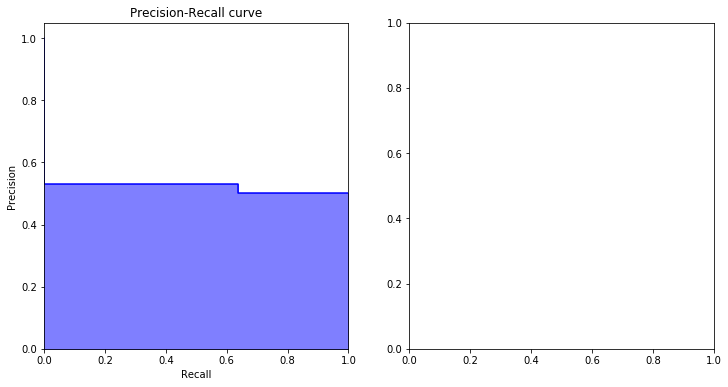

In [9]:
# predict for test set(NB)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
pred_gnb = clf_B_nb.predict(x_test)
evaluating(lbl_test, pred_gnb, ax1)

In [ ]:
# predict classes for test set(LogisticR)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
y_pred = lr.predict(x_test)
evaluating(lbl_test, y_pred, ax1)

accuracy: 0.5664777919941509


                   pre       rec       spe        f1       geo       iba       sup

          0       0.55      0.80      0.34      0.65      0.52      0.28     27317
          1       0.62      0.34      0.80      0.44      0.52      0.26     27393

avg / total       0.58      0.57      0.57      0.54      0.52      0.27     54710



[[21740  5577]
 [18141  9252]]


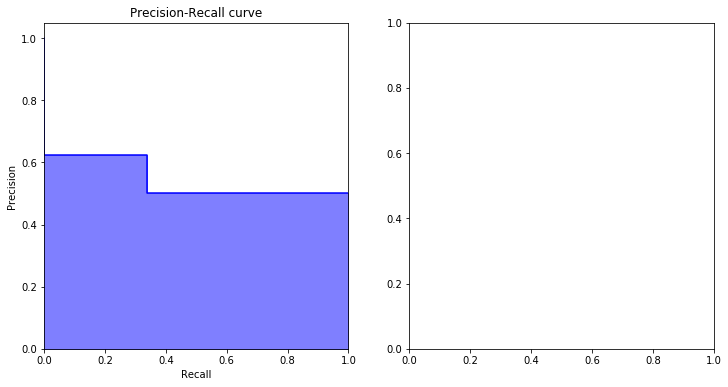

In [13]:
# predict classes for test set(DNN model)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
pred = model.predict_classes(x_test)
evaluating(lbl_test2, pred, ax1)